<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L10-Graph%20Convolutional%20Networks/Supporting_Documents/library_networkx/library_networkx_note__03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Node embeddings using random walks and Node2Vec


### Node Embeddings: Definition

- **Node embeddings** are low-dimensional vector representations of nodes in a graph.
- These embeddings capture both the structural relationships (e.g., connectivity patterns) and, if available, the attributes of nodes.
- The goal is to map nodes from a high-dimensional and sparse representation (based on graph structure) into a dense, continuous vector space, where similar nodes in the graph are close in this space.
- Once nodes are embedded in a vector space, these embeddings can be used for downstream tasks, such as **node classification**, **link prediction**, and **community detection**.

### Why Use Node Embeddings?

- **Dimensionality Reduction**: Graphs are often large and sparse. Embeddings reduce the dimensionality while retaining essential information about each node's role and context.
- **Compatibility with Machine Learning**: Traditional machine learning algorithms work on fixed-length feature vectors, not graph structures. Node embeddings provide a way to transform graph data into a format usable by these algorithms.
- **Capture Similarity and Relationships**: Nodes that are "similar" in the graph (e.g., in terms of neighborhood structure) are represented by similar embeddings. This is useful for tasks like node similarity and community detection.

### How Are Node Embeddings Created?

Common techniques for generating node embeddings include:
1. **Random Walk-Based Methods**:
   - **DeepWalk**: Uses random walks and Word2Vec to learn embeddings by predicting neighboring nodes.
   - **Node2Vec**: Similar to DeepWalk but uses biased random walks (towards breadth-first or depth-first search) to capture more specific types of graph structure.

2. **Matrix Factorization**:
   - **Graph Factorization**: Factorizes the adjacency matrix to produce embeddings based on connections.
   - **Laplacian Eigenmaps**: Uses the graph Laplacian matrix to preserve proximity between nodes.

3. **Graph Neural Networks (GNNs)**:
   - **Graph Convolutional Networks (GCNs)**: Apply convolutional layers to aggregate information from each node's neighbors to learn embeddings.
   - **Graph Attention Networks (GATs)**: Use attention mechanisms to learn weighted aggregations from neighbors.

### Examples of Node Embeddings in Practice

1. **Social Network Analysis**:
   - In a social network graph (e.g., Facebook), each node represents a user, and edges represent friendships.
   - **Node Embedding Use Case**: By learning embeddings, users with similar connections and shared interests can be clustered. The embeddings can be used to recommend new friends or identify communities.

2. **Citation Networks**:
   - In a citation network graph (e.g., research papers citing each other), each node is a paper, and edges represent citation relationships.
   - **Node Embedding Use Case**: Node embeddings allow similar papers (based on citation patterns) to be clustered together, aiding in topic discovery or recommendation systems for suggesting related papers.

3. **E-commerce (Product Recommendations)**:
   - In an e-commerce setting, nodes represent products, and edges represent interactions (e.g., co-purchases by customers).
   - **Node Embedding Use Case**: Product embeddings can help identify similar products, recommend products, or detect clusters of related items based on user behavior.

4. **Molecular Graphs (Drug Discovery)**:
   - In molecular graphs, each node represents an atom, and edges represent bonds between atoms.
   - **Node Embedding Use Case**: Node embeddings can help predict molecular properties, such as toxicity, solubility, or binding affinity, which are crucial in drug discovery and chemical property prediction.

5. **Transportation Networks**:
   - In a transportation network graph, nodes can represent locations or stations, and edges represent direct routes.
   - **Node Embedding Use Case**: Node embeddings can capture patterns in traffic flow, predict congested routes, or suggest optimal travel paths based on historical data.

### Example Output of Node Embeddings

If a graph embedding method generates a 2-dimensional embedding for nodes, the output could look something like this (each node is represented as a 2-dimensional vector):

| Node | Embedding (2D)      |
|------|----------------------|
| 1    | [0.4, 0.8]          |
| 2    | [0.3, 0.9]          |
| 3    | [1.0, 0.5]          |
| 4    | [0.2, 0.7]          |
| 5    | [0.9, 0.4]          |

- In this table, nodes 1 and 2 have similar embeddings, suggesting they may have similar roles or connections in the graph.

### Summary

Node embeddings are versatile representations that capture the structural and contextual properties of nodes in a graph. They transform complex, high-dimensional graph data into low-dimensional vector spaces that can be used with traditional machine learning algorithms, enabling tasks like classification, clustering, and recommendation on graph-structured data.

# Demonstration 51: Node Embeddings with Random Walk


###### Random Walk Node Embedding Code

1. **Random Walk on Graphs**:
   - A random walk is a sequence of steps within a graph, where each step moves from the current node to a randomly chosen neighboring node.
   - Used in graph-based machine learning to capture local graph structure and relationships between nodes.

2. **Applications of Random Walks**:
   - **Node Embeddings**: Random walks are often used in algorithms like Node2Vec and DeepWalk to generate node embeddings, which are vector representations of nodes.
   - **Graph Sampling**: Useful for sampling large graphs to understand local structures without processing the entire graph.
   - **Similarity and Clustering**: Nodes visited together frequently are likely to have similar roles or properties, useful for clustering or community detection.

3. **Steps in Random Walk Code**:
   - **Initialize Walk**: Start from a specified node and initialize the walk sequence with this node.
   - **Neighbor Selection**:
     - At each step, list the neighbors of the current node.
     - Randomly select one neighbor as the next node in the walk.
   - **Early Termination**: If the current node has no neighbors (isolated node), the walk ends.

4. **Random Walk Length**:
   - The length of the walk (`walk_length`) determines how far the walk explores the graph.
   - Shorter walks capture local structure; longer walks explore more global graph structure.

5. **NetworkX and Numpy**:
   - **NetworkX**: A Python library for creating and analyzing graphs, used here to define the graph and get neighbors of nodes.
   - **NumPy**: Used to randomly select a neighbor from a list of neighbors, introducing randomness to the walk.

6. **Sample Graph**:
   - The `karate_club_graph` is a small, well-known social network graph used as a sample.
   - It represents social relationships in a karate club and is often used in graph theory examples.

7. **Interpretation of Walk Output**:
   - The output is a sequence of nodes visited during the walk, showing a path that captures local neighborhood information.
   - Multiple random walks can be performed from various nodes to better represent the entire graph’s structure.

8. **Embedding Generation**:
   - By performing multiple random walks from each node, we can generate node sequences that are then used to learn embeddings.
   - These embeddings capture relationships between nodes based on co-occurrence in walks, similar to how word embeddings are created in NLP.

In [7]:
# Import necessary libraries
import networkx as nx  # Library for creating and working with graphs
import numpy as np     # Library for numerical operations, used here for random sampling

# Define a function to perform random walks on the graph
def random_walk(G, start_node, walk_length):
    """
    Perform a random walk on graph G starting from start_node.

    Parameters:
    - G: The graph (as a NetworkX graph) on which to perform the random walk.
    - start_node: The node from which the random walk begins.
    - walk_length: The length of the walk, or how many steps the walk should take.

    Returns:
    - walk: A list of nodes representing the sequence of nodes visited during the random walk.
    """
    # Initialize the walk with the starting node
    walk = [start_node]

    # Perform the walk up to the specified length
    for _ in range(walk_length - 1):  # Subtract 1 because we start with the first node
        # Get the neighbors of the last node in the current walk
        neighbors = list(G.neighbors(walk[-1]))

        # If there are no neighbors (isolated node), end the walk
        if not neighbors:
            break

        # Randomly choose the next node from the neighbors
        walk.append(np.random.choice(neighbors))

    return walk  # Return the sequence of nodes visited

# Create a sample graph
# Using the Karate Club graph as an example; this can be replaced with any graph data
#nx.karate_club_graph(): Creates the Zachary's Karate Club graph, a commonly used sample graph in network analysis. This graph has 34 nodes and 78 edges, representing social interactions in a karate club.
G = nx.karate_club_graph()

# Perform a random walk starting from node 0 with a length of 5 steps
random_walk_result = random_walk(G, start_node=0, walk_length=5)

# Print the result of the random walk
print("Random Walk from Node 0:", random_walk_result)


Random Walk from Node 0: [0, 11, 0, 5, 6]


# Demonstration 52: DeepWalk Embeddings

### DeepWalk Embeddings: Key Concepts

1. **Purpose**:
   - DeepWalk is a method for generating **node embeddings**—vector representations of nodes that capture graph structure.
   - It’s used in machine learning tasks on graphs, such as **node classification**, **link prediction**, and **community detection**.

2. **Inspiration from NLP**:
   - DeepWalk adapts techniques from **natural language processing (NLP)**, specifically **Word2Vec**.
   - In NLP, Word2Vec learns word embeddings by predicting the context of words. Similarly, DeepWalk learns node embeddings by predicting the context (neighbors) of nodes in a graph.

3. **Process Overview**:
   - **Random Walks**: Perform multiple random walks from each node to capture the local structure of the graph. Each random walk generates a sequence of nodes, similar to a sentence in NLP.
   - **Node Context**: Each sequence (walk) captures the neighbors (context) of each node in the graph, providing insights into its structural role.
   - **Embedding Learning**: Treat each node in the walk sequence like a word in a sentence and use the Word2Vec model (usually **Skip-Gram**) to learn embeddings.

4. **Key Steps**:
   - **Step 1: Generate Random Walks**:
     - From each node, perform multiple random walks of a fixed length.
     - The result is a set of node sequences, where nodes that frequently appear together in sequences are more likely to have similar embeddings.
   
   - **Step 2: Train Word2Vec on Walks**:
     - Use Word2Vec (Skip-Gram) to learn embeddings by maximizing the probability of node co-occurrences in these sequences.
     - The model outputs embeddings where nodes that often appear together in walks have similar vectors.

5. **Parameters**:
   - **Walk Length**: Determines how far each walk explores from the starting node.
   - **Number of Walks**: The number of random walks starting from each node, affecting embedding quality.
   - **Embedding Dimension**: Specifies the dimensionality of the output embeddings (e.g., 128, 256).
   - **Window Size**: Defines the context window size in Word2Vec, which determines how many nearby nodes are considered when training.

6. **Benefits**:
   - **Captures Local and Global Structure**: Shorter walks capture local structure, while multiple walks provide a broader view, helping to capture both local and global graph information.
   - **Unsupervised Learning**: Does not require labels; embeddings can be learned on any graph.
   - **Versatility**: Works on various types of graphs, including social networks, knowledge graphs, and citation networks.

7. **Applications**:
   - **Node Classification**: Map nodes to embeddings and use them as features for supervised learning tasks.
   - **Link Prediction**: Predict the likelihood of edges between nodes based on their embedding similarity.
   - **Community Detection**: Use embeddings to identify clusters or communities in the graph.

8. **Limitations**:
   - **Memory Intensive**: For large graphs, storing random walks and training embeddings can be resource-intensive.
   - **Fixed Embeddings**: DeepWalk learns static embeddings, which are not ideal for dynamic graphs where nodes and edges change over time.

9. **Comparison to Other Models**:
   - Unlike **Node2Vec**, DeepWalk does not use biased random walks (Node2Vec biases the walks towards Breadth-First or Depth-First sampling).
   - **Graph Neural Networks (GNNs)** offer a more flexible alternative that can incorporate both node features and graph structure, but are generally more complex and computationally expensive.

### Summary
DeepWalk is a powerful technique for learning unsupervised embeddings on graphs, leveraging random walks and Word2Vec to produce meaningful representations of nodes. Its simplicity, adaptability to different graphs, and ability to capture both local and global structures make it popular in graph-based machine learning tasks.

In [10]:

# Generate multiple random walks from each node
walks = []
for node in G.nodes():
    for _ in range(10):  # Number of walks per node
        walks.append(random_walk(G, start_node=node, walk_length=5))

print("Generated Walks for DeepWalk:", walks)


Generated Walks for DeepWalk: [[0, 3, 7, 2, 9], [0, 2, 28, 31, 28], [0, 12, 3, 12, 3], [0, 4, 0, 6, 0], [0, 6, 16, 5, 6], [0, 4, 0, 11, 0], [0, 21, 0, 19, 1], [0, 7, 0, 8, 0], [0, 3, 2, 13, 2], [0, 4, 6, 16, 6], [1, 2, 28, 31, 33], [1, 3, 0, 7, 2], [1, 30, 1, 3, 0], [1, 13, 3, 1, 21], [1, 7, 2, 7, 1], [1, 13, 1, 17, 1], [1, 21, 0, 5, 0], [1, 7, 1, 7, 2], [1, 21, 1, 13, 0], [1, 19, 33, 31, 0], [2, 9, 33, 32, 30], [2, 8, 33, 23, 32], [2, 27, 23, 33, 30], [2, 13, 1, 7, 1], [2, 13, 1, 21, 0], [2, 28, 33, 32, 8], [2, 3, 7, 2, 9], [2, 32, 8, 0, 1], [2, 7, 0, 17, 1], [2, 3, 12, 0, 17], [3, 1, 0, 5, 0], [3, 2, 28, 2, 0], [3, 12, 3, 0, 12], [3, 7, 0, 13, 3], [3, 13, 33, 30, 32], [3, 1, 21, 1, 30], [3, 1, 3, 1, 21], [3, 1, 7, 2, 1], [3, 7, 3, 12, 3], [3, 7, 3, 1, 21], [4, 0, 2, 0, 10], [4, 10, 0, 3, 1], [4, 6, 16, 6, 16], [4, 6, 5, 6, 4], [4, 0, 21, 0, 12], [4, 10, 4, 10, 0], [4, 0, 12, 0, 19], [4, 6, 5, 10, 5], [4, 10, 0, 11, 0], [4, 10, 0, 13, 0], [5, 6, 4, 0, 31], [5, 6, 4, 6, 4], [5, 6, 5, 1

# Demonstration 53: Node2Vec Embeddings
 Node2Vec is an extension of DeepWalk that incorporates a bias between breadth-first and depth-first search.


In [12]:
!pip install node2vec

In [13]:

from node2vec import Node2Vec

# Initialize Node2Vec
node2vec = Node2Vec(G, dimensions=2, walk_length=5, num_walks=10, workers=1)

# Generate embeddings
model = node2vec.fit(window=3, min_count=1, batch_words=4)
print("Node2Vec embeddings generated.")


Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 246.73it/s]


Node2Vec embeddings generated.


# Demonstration 54: Visualizing Node2Vec Embeddings
 Node embeddings can be visualized in 2D space to understand the relationship between nodes.


In [15]:
import matplotlib.pyplot as plt
import numpy as np


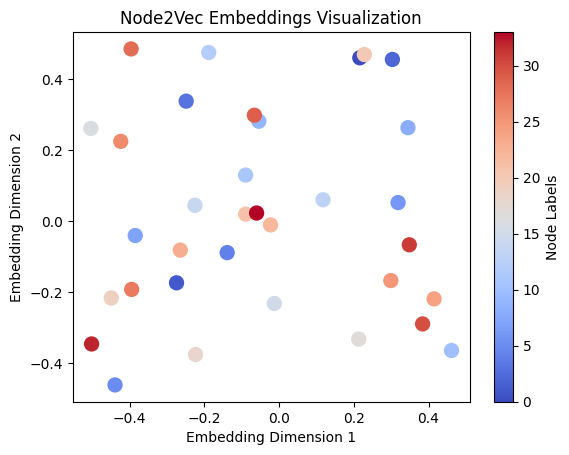

In [18]:
node_labels = list(range(len(G.nodes()))) # create dummy labels (0, 1, 2, ...)

# Retrieve embeddings and plot
node_embeddings = np.array([model.wv[str(node)] for node in G.nodes()])
plt.scatter(node_embeddings[:, 0], node_embeddings[:, 1], c=node_labels, cmap="coolwarm", s=100)
plt.title("Node2Vec Embeddings Visualization")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.colorbar(label="Node Labels")
plt.show()


# Demonstration 55: Graph Attention Network (GAT) Layer
 Graph Attention Networks (GATs) use attention mechanisms to assign different weights to neighbor nodes.


In [21]:
import torch
import torch.nn as nn  # Import the necessary module for defining neural network layers

# Define a Graph Attention Layer (GAT)
class GATLayer(nn.Module):
    """
    A Graph Attention Layer (GAT) that applies attention to aggregate neighbor features
    based on learnable attention weights.
    """

    def __init__(self, in_features, out_features):
        """
        Initializes the GAT layer with specified input and output feature dimensions.

        Parameters:
        - in_features (int): Number of input features for each node.
        - out_features (int): Number of output features for each node after applying attention.
        """
        super(GATLayer, self).__init__()

        # Linear transformation for node features (without bias)
        # Maps the input features to the output feature space for each node
        self.fc = nn.Linear(in_features, out_features, bias=False)

        # Linear layer to compute attention scores for pairs of nodes
        # Takes concatenated feature vectors of two nodes (2 * out_features as input) and outputs a single score
        self.attn_fc = nn.Linear(2 * out_features, 1, bias=False)

    def forward(self, x, adj):
        """
        Forward pass through the GAT layer.

        Parameters:
        - x (Tensor): Node feature matrix of shape (num_nodes, in_features), where each row is a node's feature vector.
        - adj (Tensor): Adjacency matrix of shape (num_nodes, num_nodes), where adj[i][j] > 0 if there's an edge from node i to j.

        Returns:
        - h_prime (Tensor): The output feature matrix after applying attention, of shape (num_nodes, out_features).
        """

        # Step 1: Apply linear transformation to node features
        h = self.fc(x)  # Shape after transformation: (num_nodes, out_features)

        # Step 2: Prepare attention mechanism inputs
        N = h.size(0)  # Number of nodes in the graph

        # Repeat the transformed features to concatenate pairs of nodes
        # h.repeat(1, N) repeats each node's features N times horizontally
        # .view(N * N, -1) reshapes the matrix to have N * N rows, where each pair will be concatenated
        a_input = torch.cat([h.repeat(1, N).view(N * N, -1), h.repeat(N, 1)], dim=1).view(N, N, 2 * h.size(1))

        # Step 3: Compute attention scores
        # Pass concatenated features of node pairs through the attention layer
        # The result `e` is a matrix of raw attention scores for each pair of nodes
        e = torch.relu(self.attn_fc(a_input)).squeeze(2)  # Shape of e: (N, N)

        # Step 4: Mask attention weights with the adjacency matrix
        # Set attention scores to negative infinity (-inf) where there is no edge (i.e., adj[i][j] == 0)
        # This ensures that non-connected nodes do not influence each other
        attention = torch.where(adj > 0, e, torch.tensor(float('-inf')))

        # Step 5: Apply softmax to attention scores along rows to normalize them
        # This converts raw scores into probabilities that sum to 1 for each node
        attention = torch.softmax(attention, dim=1)  # Shape of attention: (N, N)

        # Step 6: Aggregate features using attention scores
        # Multiply the attention scores with the transformed node features
        # This aggregates information from neighbors, weighted by attention scores
        h_prime = torch.matmul(attention, h)  # Shape of h_prime: (N, out_features)

        return h_prime  # Return the output feature matrix after attention-based aggregation

# Initialize GAT layer
gat_layer = GATLayer(in_features=2, out_features=4)  # Define layer with 2 input features and 4 output features
print("Graph Attention Layer created.")


Graph Attention Layer created.


# Demonstration 56: Forward Pass through GAT Layer
 Let's perform a forward pass through the GAT layer to see how attention works on graph data.

In [25]:
import torch
# Assuming you have node_features as a NumPy array
# Replace with your actual node features data
node_features = [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]]  # Example data

# Convert node features to a PyTorch tensor
node_features_tensor = torch.tensor(node_features, dtype=torch.float32)

# Assuming you have adj_matrix as a NumPy array
# Replace with your actual adjacency matrix data
adj_matrix = [[0, 1, 1], [1, 0, 0], [1, 0, 0]]  # Example data

# Convert adjacency matrix to a PyTorch tensor
adj_matrix_tensor = torch.tensor(adj_matrix, dtype=torch.float32)

print("Node Features Tensor:\n", node_features_tensor)
print("Adjacency Matrix Tensor:\n", adj_matrix_tensor)
# Pass node features and adjacency matrix through GAT layer
output_gat = gat_layer(node_features_tensor, adj_matrix_tensor)
print("Output after GAT layer:\n", output_gat)

Node Features Tensor:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Adjacency Matrix Tensor:
 tensor([[0., 1., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])
Output after GAT layer:
 tensor([[ 4.5897, -3.1768, -2.4410,  5.4477],
        [ 1.5795, -1.1211, -1.0173,  1.7830],
        [ 1.5795, -1.1211, -1.0173,  1.7830]], grad_fn=<MmBackward0>)


# Demonstration 57: Multi-head Attention in GAT


#### Multi-Head Attention in Graph Attention Networks (GAT)

- In Graph Attention Networks (GAT), **multi-head attention** is an extension that allows multiple independent attention mechanisms (or "heads") to operate in parallel.
- Each attention head learns to focus on different aspects of neighboring nodes, capturing richer and more diverse information.
- The outputs of these heads are then combined to produce the final node embeddings.

#### Why Use Multi-Head Attention?

1. **Enhanced Representation**:
   - Different attention heads can capture different patterns or relationships in the neighborhood of each node.
   - This diversity leads to more expressive embeddings as each head contributes unique information.

2. **Improved Stability**:
   - Averaging multiple attention heads reduces the variance in the model, making it more robust and less prone to overfitting.

3. **Flexible Aggregation**:
   - Multi-head attention in GAT can either concatenate the outputs from each head (for richer embeddings) or average them (for stable representations).


In [26]:

class MultiHeadGATLayer(nn.Module):
    def __init__(self, in_features, out_features, num_heads):
        super(MultiHeadGATLayer, self).__init__()
        self.heads = nn.ModuleList([GATLayer(in_features, out_features) for _ in range(num_heads)])

    def forward(self, x, adj):
        head_outputs = [head(x, adj) for head in self.heads]
        return torch.cat(head_outputs, dim=1)

# Initialize multi-head GAT layer with 3 heads
multi_head_gat = MultiHeadGATLayer(in_features=2, out_features=4, num_heads=3)
print("Multi-Head GAT Layer created.")


Multi-Head GAT Layer created.


# Demonstration 58: Training a Multi-head GAT Model for Node Classification
 Let's build a GAT model with multi-head attention for node classification.


In [27]:

class GATNodeClassifier(nn.Module):
    def __init__(self):
        super(GATNodeClassifier, self).__init__()
        self.gat1 = MultiHeadGATLayer(in_features=2, out_features=4, num_heads=3)
        self.fc = nn.Linear(4 * 3, 1)  # Final layer for binary classification with 3 heads

    def forward(self, x, adj):
        x = self.gat1(x, adj)
        x = torch.relu(x)
        x = self.fc(x.mean(dim=0))
        return x

# Initialize the GAT model
gat_classifier = GATNodeClassifier()
print("GAT Node Classifier created.")


GAT Node Classifier created.


# Demonstration 59: Training the GAT Node Classifier Model
 We’ll train the GAT classifier model on a simple node classification task.


In [31]:
import torch
import torch.optim as optim
import torch.nn as nn

# Assuming you have a binary classification problem:
# 1 or 0. Replace with the actual label.
graph_label = torch.tensor([1], dtype=torch.float)

# Define loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(gat_classifier.parameters(), lr=0.01)

# Training loop for 5 epochs
for epoch in range(5):
    # Remove the squeeze() operation to keep the output as a single-element tensor
    output = gat_classifier(node_features_tensor, adj_matrix_tensor)
    loss = loss_fn(output, graph_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.3490425944328308
Epoch 2, Loss: 0.29409730434417725
Epoch 3, Loss: 0.24665610492229462
Epoch 4, Loss: 0.20589958131313324
Epoch 5, Loss: 0.1712917685508728


# Demonstration 60: Evaluating the GAT Model
 After training, let's evaluate the predictions from the GAT model.


In [34]:

# Get predictions
output = gat_classifier(node_features_tensor, adj_matrix_tensor).squeeze()
print("Output:", output)
prediction = (torch.sigmoid(output) > 0.5).int()
print("Prediction:", prediction)
print("Actual Label:", graph_label.int())



Output: tensor(1.8786, grad_fn=<SqueezeBackward0>)
Prediction: tensor(1, dtype=torch.int32)
Actual Label: tensor([1], dtype=torch.int32)
